In [252]:
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy import sqrt
import pandas as pd

In [253]:
df = pd.read_csv('data/only2_big_with_sf.csv')
# df = df.transpose()
df.set_index('cell_line', inplace=True)
# df = df.transpose()
df.head()

,7105,8813,57147,55732,2268,3075,2519,2729,4800,90529,...,8336,84311,126661,79447,283521,29122,9997,388963,6905,SF
cell_line,,,,,,,,,,,,,,,,,,,,,
NCIH1568-2,5.626439,6.855242,2.185867,4.079805,0.084064,0.176323,6.824513,4.956521,3.766595,2.298658,...,0.622930,5.373996,1.956057,5.482203,0.422233,0.176323,0.918386,1.778209,4.050502,0.607940
SCC9-2,3.964399,5.718088,2.260026,3.451541,0.084064,0.782409,6.039796,5.778734,4.903038,2.711495,...,1.536053,5.042207,2.344828,3.937344,0.000000,0.042644,2.475085,1.176323,4.174726,0.573035
HCC1428-2,4.002703,5.870365,3.621759,3.861955,0.014355,0.485427,4.614121,5.286881,4.429616,3.442280,...,3.033863,4.539159,1.970854,5.895303,0.622930,0.014355,0.918386,2.244887,5.555816,0.450188
U2OS-2,5.098453,6.543496,2.117695,4.115200,0.014355,0.432959,5.684258,4.847997,5.108524,2.189034,...,0.176323,5.028569,2.967169,4.995937,0.111031,0.042644,2.010780,1.925999,4.635754,0.526517
LU99-2,3.665620,6.716717,2.100978,4.176323,0.000000,1.263034,6.124948,4.395063,5.070389,2.669027,...,1.321928,6.613679,1.438293,4.349082,0.000000,0.111031,1.111031,1.632268,5.197315,0.625161


In [254]:
x, y = df[['653140', '30010', '90580', '4837', '1002', '89887', '54863', '57655', '7277', '199745', '6664', '27201', '64065', '10498', '51151', '4086', '57228', '9427', '257144', '85236', '1522', '2555', '129807', '63910', '3487', '126299', '10121', '11098', '136', '342918', '57787', '85416', '83439', '9507', '112770', '90861', '84627', '51115', '225', '3764', '3077', '23127', '51764', '120114', '1107', '51477', '799', '23170', '7755', '29941', '283869', '487', '84561', '4171', '53831', '192286', '84891', '79705', '2322', '5300', '91369', '1870', '440193', '1687', '57834', '83638', '54511', '22871', '83461', '84881', '64708', '160851', '81608', '1591', '132671', '126661', '57168', '90075', '960', '5609', '7329', '79669', '29855', '115761', '200916', '120379', '7049', '10054', '83983', '25959', '1893', '4858', '10135', '9411', '59335', '3425', '301', '22924', '23295', '23389', '54507', '57478', '9783', '547', '90853', '25822', '26135', '6695', '59271', '2850', '153657', '23259', '79134', '6383', '28316', '23316', '26353', '11264', '4233', '5653', '65993', '4986', '29126', '151887', '29998', '63035', '54926', '374875', '57414', '29948', '54014', '6136', '84443', '23181', '57689', '55074', '79841', '5340', '286205', '54921', '2876', '84662', '57451', '150684', '79690', '221336', '245972', '65249', '10672', '196', '90378', '9869', '79805', '389', '57216', '170261', '7262', '27324', '8645', '387885', '29105', '199731', '79664', '2124', '653857', '5207', '6619', '51773', '90416', '91801', '8288', '65217', '55486.1', '116412', '55138', '50839', '51222', '157313', '10189', '63897', '29965', '2256', '147138', '121340', '84197', '27239', '8228', '27286', '10397', '64168', '80312', '163126', '84206', '4771', '26065', '55166', '55214', '57472', '58480', '170685', '404550', '171484', '80790', '222553', '90121', '138162', '84275', '10343', '64241', '55857', '10023', '23348', '342977', '23354', '793', '339488', '8894', '57799', '4199', '10951', '324', '57007', '283464', '3104', '57585', '2512', '23331', '9873', '79169', '7846', '93550', '284358', '80164', '6925', '84986', '55766', '6689', '8277', '374739', '64073', '253980', '3029', '23179', '57158', '90826', '3575', '5734', '146923', '1608', '3646', '1337', '8165', '51496', '57552', '64859', '165', '2152', '91107', '84332', '134353', '2902', '885', '4257', '246175', '5451', '26022', '8829', '84269', '9169', '10413', '56034', '79813', '7045', '9200', '3222', '6330', '51364', '55623', '54665', '3241', '58512', '860', '92797', '79948', '84641', '284', '57465', '374946', '54704', '283248', '126295', '9242', '8347', '6899', '54708']], df['SF']

In [255]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.1, random_state=42)

In [256]:

print(bay_ridge)
bay_ridge = BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=1000,
       normalize=True, tol=0.001, verbose=False)

BayesianRidge(n_iter=1000, normalize=False)


In [257]:
bay_ridge.fit(xtrain, ytrain)

C:\Users\Udi\Documents\GitHub\RadiationProject\venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), BayesianRidge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


BayesianRidge(n_iter=1000, normalize=True)

In [258]:
score=bay_ridge.score(xtest, ytest)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 0.16


In [259]:
ypred = bay_ridge.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)

MSE: 0.03


In [260]:
print("RMSE: %.2f" % sqrt(mse))

RMSE: 0.17


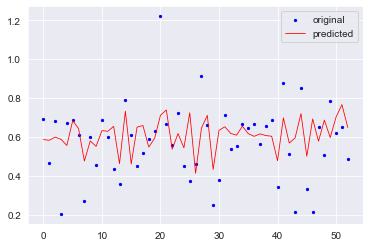

In [261]:
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()